In [1]:
import pandas as pd
import pubchempy
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis and Comparison

In [22]:
ECreact = pd.read_csv('data/reactions/ECReact.csv')
ECreact['rxn_smiles'] = ECreact['rxn_smiles'].str.split('|').str[0] + '>>' + ECreact['rxn_smiles'].str.split('>>').str[1]
ECreact.rename(columns={'rxn_smiles': 'Reaction', 'ec': 'EC number', 'source':'Source'}, inplace=True)
ECreact

,Reaction,EC number,Source
0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,1.2.1.8,brenda_reaction_smiles
1,C=C(C)CCOP(=O)([O-])OP(=O)([O-])[O-].CC(C)=CCO...,2.5.1.85,brenda_reaction_smiles
2,N.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O...,1.4.1.4,brenda_reaction_smiles
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,1.1.1.3,brenda_reaction_smiles
4,Cc1cn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2.7.7.9,brenda_reaction_smiles
...,...,...,...
62217,CCCCC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CCC(=O)O[C@@...,2.3.1.76,pathbank_reaction_smiles
62218,CCCCCCCCCCCC/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O...,2.7.8.41,pathbank_reaction_smiles
62219,CCCCCCCCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCCCCCCC...,2.7.8.41,pathbank_reaction_smiles
62220,CCCCCC/C=C\CCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCC...,2.7.8.41,pathbank_reaction_smiles


In [25]:
enzymemap = pd.read_csv('data/reactions/EnzymeMap.csv')
enzymemap.rename(columns={'ec_num': 'EC number', 'unmapped': 'Reaction', 'orig_rxn_text':'Reaction Text'}, inplace=True)
enzymemap = enzymemap[['Reaction', 'EC number', 'Reaction Text']]
enzymemap.drop_duplicates(subset=['Reaction', 'EC number'], inplace=True)
enzymemap

,Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
25,CC(=O)C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
26,CC(=O)CO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
27,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,1.1.1.1,2-dehydro-3-deoxy-D-gluconate + NADH + H+ = 4-...
...,...,...,...
349453,CC(C)=CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,6.5.1.3,ATP + dimethylallyl diphosphate = dimethylally...
349454,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)O.Nc1ncnc2...,6.5.1.3,ATP + geranyl diphosphate = geranyl-triphospho...
349455,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,6.5.1.3,ATP + geranyl triphosphate = geranyl-tetraphos...
349456,C=C(C)CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,6.5.1.3,ATP + isopentenyl diphosphate = adenosine 5'-i...


In [ ]:
enzymemap.to_csv('../processed_data/reaction2EC.csv', index=False)

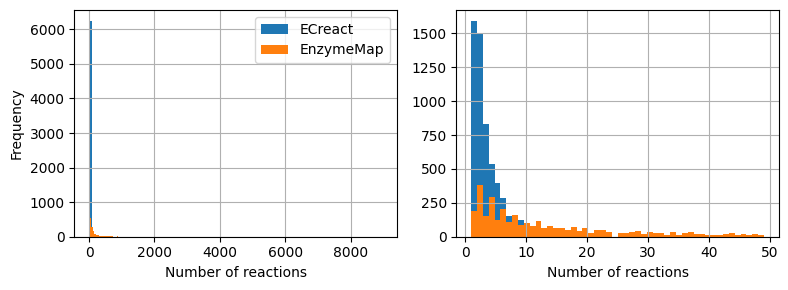

In [21]:
plt.figure(figsize=(8, 3))
plt.subplot(1,2, 1)
ECreact['ec'].value_counts().hist(bins = 100)
enzymemap['ec_num'].value_counts().hist(bins = 100)
plt.xlabel('Number of reactions')
plt.ylabel('Frequency')
plt.legend(['ECreact', 'EnzymeMap'])

plt.subplot(1,2, 2)
subset = ECreact[ECreact['ec'].map(ECreact['ec'].value_counts()) < 50]
subset['ec'].value_counts().hist(bins=50)
subset = enzymemap[enzymemap['ec_num'].map(enzymemap['ec_num'].value_counts()) < 50]
subset['ec_num'].value_counts().hist(bins=50)
plt.xlabel('Number of reactions')
plt.tight_layout()

In [ ]:
### Take a look at the reactions

In [41]:
TrpB = ECreact[ECreact['ec'] == '4.2.1.20']
promiscuous

,rxn_smiles,ec,source
2869,Clc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>NC(Cc1c[...,4.2.1.20,brenda_reaction_smiles
3264,N[C@@H](CO)C(=O)O.Oc1cccc2[nH]ccc12>>NC(Cc1c[n...,4.2.1.20,brenda_reaction_smiles
4128,N[C@@H](CO)C(=O)O.c1ccc2[nH]ccc2c1>>N[C@@H](Cc...,4.2.1.20,brenda_reaction_smiles
4227,N[C@@H](CO)C(=O)O.Oc1ccc2[nH]ccc2c1>>N[C@@H](C...,4.2.1.20,brenda_reaction_smiles
4865,O=C[C@H](O)COP(=O)(O)O.c1ccc2[nH]ccc2c1>>O=P(O...,4.2.1.20,brenda_reaction_smiles
5578,N[C@@H](CO)C(=O)O.Oc1cccc2cc[nH]c12>>NC(Cc1c[n...,4.2.1.20,brenda_reaction_smiles
5683,Cc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>Cc1ccc2[n...,4.2.1.20,brenda_reaction_smiles
5840,N#Cc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N#Cc1cc...,4.2.1.20,brenda_reaction_smiles
6049,Brc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>NC(Cc1c[...,4.2.1.20,brenda_reaction_smiles
6363,COc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>COc1ccc2...,4.2.1.20,brenda_reaction_smiles


In [25]:
promiscuous['len'] = promiscuous['rxn_smiles'].apply(lambda x: len(x))
promiscuous = promiscuous.sort_values(by='len', ascending=True)

Converting smiles to name doesn't really work that well.

In [45]:
rxn2equation(promiscuous['rxn_smiles'].values[2])

'(2S)-2-amino-3-hydroxypropanoic acid + 1H-indole = (2S)-2-amino-3-(1H-indol-3-yl)propanoic acid'

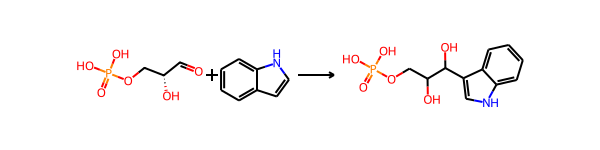

In [45]:
AllChem.ReactionFromSmarts(promiscuous['rxn_smiles'].values[4], useSmiles=True)

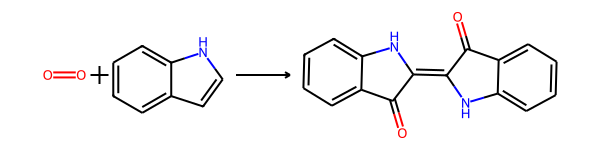

In [42]:
AllChem.ReactionFromSmarts(promiscuous['rxn_smiles'].values[6], useSmiles=True)

In [16]:
merged.to_csv(f'EC2smiles_fromRhea.csv', index=False)

### Process enzyme map dataset

In [2]:
enzymemap = pd.read_csv('processed_reactions_enzymemap.csv')
enzymemap

,rxn_idx,mapped,unmapped,orig_rxn_text,rule,rule_id,source,steps,quality,natural,organism,protein_refs,protein_db,ec_num
0,0,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,0,direct,single,0.991708,True,Saccharomyces cerevisiae,[],NaN,1.1.1.1
1,0,[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]...,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,0,direct reversed,single,0.991708,True,Saccharomyces cerevisiae,[],NaN,1.1.1.1
2,1,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,0,direct,single,0.991708,True,Ogataea angusta,['H9ZGN0'],uniprot,1.1.1.1
3,1,[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]...,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,0,direct reversed,single,0.991708,True,Ogataea angusta,['H9ZGN0'],uniprot,1.1.1.1
4,2,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,0,direct,single,0.991708,True,Chlamydomonas reinhardtii,['Q1RS84'],uniprot,1.1.1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349453,324556,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][O:6][P:7](...,CC(C)=CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,ATP + dimethylallyl diphosphate = dimethylally...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],279,direct,single,0.416667,False,Escherichia virus T4,[],NaN,6.5.1.3
349454,324557,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)O.Nc1ncnc2...,ATP + geranyl diphosphate = geranyl-triphospho...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],279,direct,single,0.416667,False,Escherichia virus T4,[],NaN,6.5.1.3
349455,324558,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,ATP + geranyl triphosphate = geranyl-tetraphos...,[#8:1].[#8:2]-[#15:3]>>[#8:2].[#8:1]-[#15:3],281,direct,single,0.583333,False,Escherichia virus T4,[],NaN,6.5.1.3
349456,324559,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,C=C(C)CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,ATP + isopentenyl diphosphate = adenosine 5'-i...,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],279,direct,single,0.416667,False,Escherichia virus T4,[],NaN,6.5.1.3


In [4]:
df = pd.DataFrame()
df['EC'] = enzymemap['ec_num'].unique()
df['EC3'] = df['EC'].str.split('.').str[:3].str.join('.')
df['EC3'].nunique()

204

In [5]:
df['EC'].nunique()

4552

In [4]:
enzymemap['protein_refs'].nunique()

15468

### There is not much overlap between the datasets

In [55]:
#find intersection of ecreact and enzymemap
ECreact_rxns = ECreact['rxn_smiles'].unique()
enzymemap_rxns = enzymemap['unmapped'].unique()
intersection = set(ECreact_rxns).intersection(set(enzymemap_rxns))
len(intersection)

311

In [33]:
enzymemap['unmapped'].nunique()

47640

In [49]:
enzymemap['mapped'].nunique()

47974

<Axes: >

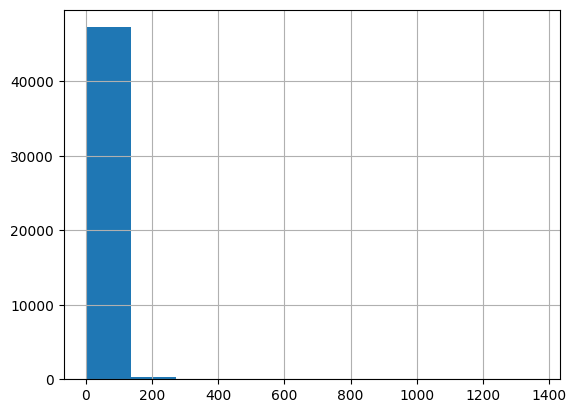

In [6]:
enzymemap['unmapped'].value_counts().hist()

In [19]:
trpB = enzymemap[enzymemap['ec_num'] == '4.2.1.20']
trpB_reactions = trpB['unmapped'].unique()
len(trpB_reactions)

54

The fluoroindole does not apply to any direct protein mapping (because it is unnantural)

In [48]:
trpB[trpB['unmapped'] == trpB_reactions[52]]

,rxn_idx,mapped,unmapped,orig_rxn_text,rule,rule_id,source,steps,quality,natural,organism,protein_refs,protein_db,ec_num
310159,288713,[F:1][c:2]1[cH:3][cH:4][c:5]2[nH:6][cH:7][cH:8...,Fc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N[C@@H](C...,L-serine + 5-fluoroindole = 5-fluorotryptophan...,[#6:1].[#6:2]-[#8:3]>>[#6:1]-[#6:2].[#8:3],294,direct,single,0.532468,False,Arabidopsis thaliana,[],NaN,4.2.1.20
310160,288714,[F:1][c:2]1[cH:3][cH:4][c:5]2[nH:6][cH:7][cH:8...,Fc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N[C@@H](C...,L-serine + 5-fluoroindole = 5-fluorotryptophan...,[#6:1].[#6:2]-[#8:3]>>[#6:1]-[#6:2].[#8:3],294,direct,single,0.532468,False,Salmonella enterica,[],NaN,4.2.1.20


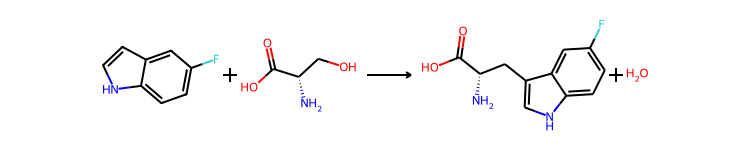

In [43]:
AllChem.ReactionFromSmarts(trpB_reactions[52], useSmiles=True)

In [166]:
clean_df = pd.read_csv('/disk1/jyang4/repos/ProteinDT_submission/data/server/processed_data/archived_with_smiles/training_sets/CLEAN_split100.csv')
clean_df

,id,brenda,sequence,reaction_smiles,reaction_eq
0,P51451,2.7.10.2,MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...,*N[C@@H](CC1=CC=C(O)C=C1)C(*)=O.NC1=NC=NC2=C1N...,ATP + L-tyrosyl-[protein] = ADP + H(+) + O-pho...
1,C7C422,3.5.2.6,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,*C1C(=O)N(*)C1*.[H]O[H]>>*[NH2+]C(*)C(*)C(=O)[O-],a beta-lactam + H2O = a substituted beta-amino...
2,P00917,4.2.1.1,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,O=C([O-])O.[H+]>>O=C=O.[H]O[H],H(+) + hydrogencarbonate = CO2 + H2O
3,Q9ULX7,4.2.1.1,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,O=C([O-])O.[H+]>>O=C=O.[H]O[H],H(+) + hydrogencarbonate = CO2 + H2O
4,P55217,2.5.1.48,MAVSSFQCPTIFSSSSISGFQCRSDPDLVGSPVGGSSRRRVHASAG...,[NH3+][C@@H](CCOC(=O)CCC(=O)[O-])C(=O)[O-].[NH...,L-cysteine + O-succinyl-L-homoserine = H(+) + ...
...,...,...,...,...,...
184730,Q325W0,4.2.1.59,MTTNTHTLQIEEILELLPHRFPFLLVDRVLDFEEGRFLRAVKNVSV...,*N[C@@H](COP(=O)([O-])OCC(C)(C)[C@@H](O)C(=O)N...,a (3R)-hydroxyacyl-[ACP] = a (2E)-enoyl-[ACP] ...
184731,A0A140CUL9,1.1.99.13,MAENNTYDAIVIGSGISGGWATKELTEKGLKTLMLERGRNIEHVKD...,*.OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O...,A + sucrose = 3-dehydro-alpha-D-glucosyl beta-...
184732,W6JQJ6,1.13.12.2,MNKNNRHPADGKKPITIFGPDFPFAFDDWLEHPAGLGSIPAARHGE...,O=O.[NH3+]CCCC[C@H]([NH3+])C(=O)[O-]>>NC(=O)CC...,L-lysine + O2 = 5-aminopentanamide + CO2 + H2O
184733,B3IVI7,3.5.1.30,MRIALYQGAPKPLDVPGNLQRLRHQAQLAAERGAQLLVCPEMFLTG...,NC(=O)CCCC[NH3+].[H]O[H]>>[H][N+]([H])([H])[H]...,5-aminopentanamide + H2O = 5-aminopentanoate +...


### Look at distribution of EC numbers

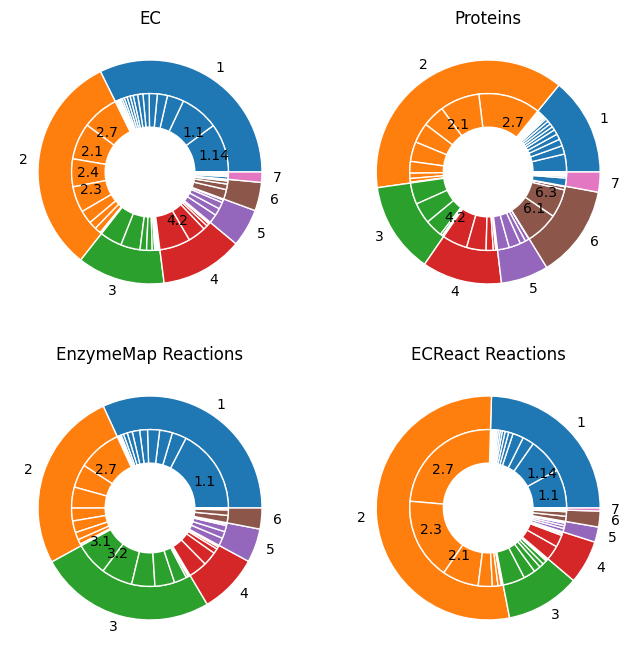

In [173]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for index, title in enumerate(['EC', 'Proteins', 'EnzymeMap Reactions', 'ECReact Reactions']):

    df = pd.DataFrame()
    
    if index == 0:
        df['EC'] = clean_df['brenda'].unique()
    elif index == 2:
        df['EC'] = enzymemap['ec_num']
    elif index == 3:
        df['EC'] = ECreact['ec']
    elif index == 1:
        df['EC'] = clean_df['brenda']
    
    df['EC1'] = df['EC'].str.split('.').str[0]
    df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

    distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
    level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

    #concatenate zeros so that each list is the same length
    max_len = max([len(l) for l in distribution])
    for i, l in enumerate(distribution):
        distribution[i] = l + [0] * (max_len - len(l))
        level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
    #distribution

    sum = np.sum(np.sum(distribution))
    #replace level2 labels with an empty string if the corresponding entry in distribution is too small
    for i, l in enumerate(distribution):
        for j, count in enumerate(l):
            if count/sum < 0.05:
                level2_labels[i][j] = ''


    size = 0.3
    #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
    vals = np.array(distribution)
    i = index // 2
    j = index % 2

    cmap = plt.colormaps["tab10"]
    #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
    #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

    mylabels = np.arange(1, vals.shape[0]+1)

    outer_colors = sns.color_palette("tab10", vals.shape[0])
    axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
    #repeat the outer colors as the inner colors
    inner_colors = []
    for k in range(6):
        inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


    axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

    axs[i, j].set(aspect="equal", title=title)
plt.show()